In [4]:
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import unittest
%matplotlib inline

Creating a Map class to fully utilize functionality of grid from the other notebook.

Library:

In [5]:
def assigning_edges(Grid: 'Networkx Edgeless Graph', grid_map: 'numpy array',dimensions: (int,int)):
    for row in range(dimensions[0]):
        for col in range(dimensions[1]):
            directions = {'up': True,'down': True,'left': True,'right': True, 'up-left': True, 'up-right': True, 'down-left': True, 'down-right': True}
            #direction removal checks
            if row == 0:
                directions['up'] = False
                directions['up-left'] = False
                directions['up-right'] = False
            if row == dimensions[0]-1:
                directions['down'] = False
                directions['down-left'] = False
                directions['down-right'] = False
            if col == 0:
                directions['left'] = False
                directions['up-left'] = False
                directions['down-left'] = False
            if col == dimensions[1]-1:
                directions['right'] = False
                directions['up-right'] = False
                directions['down-right'] = False

            for direction, tf in directions.items():
                if tf:
                    if directions=='up':
                        Grid.add_edge(grid_map[row,col], grid_map[row-1,col])
                    elif direction=='right':
                        Grid.add_edge(grid_map[row,col], grid_map[row,col+1])
                    elif direction=='down':
                        Grid.add_edge(grid_map[row,col], grid_map[row+1,col])
                    elif direction=='left':
                        Grid.add_edge(grid_map[row,col], grid_map[row,col-1])
                    elif direction=='up-left':
                         Grid.add_edge(grid_map[row,col], grid_map[row-1,col-1])
                    elif direction=='up-right':
                         Grid.add_edge(grid_map[row,col], grid_map[row-1,col+1])
                    elif direction=='down-left':
                         Grid.add_edge(grid_map[row,col], grid_map[row+1,col-1])
                    elif direction=='down-right':
                         Grid.add_edge(grid_map[row,col], grid_map[row+1,col+1])
    return Grid
def generate_grid(row: int, height: int) -> 'Networkx Graph':
    dimensions = (row,height)
    list_grid_map = np.arange(row*height)
    grid_map = list_grid_map.reshape(row,height)
    Grid = nx.Graph()
    Grid.add_nodes_from(list_grid_map)
    
    Grid = assigning_edges(Grid, grid_map, dimensions)
    return Grid

In [16]:
class Map:
    def __init__(self, row=3, height=3, start = 0, end = 0):
        self.grid = generate_grid(row,height)
        
        self.dimensions = (row,height)
        
        self.grid_map = np.arange(row*height)
        self.grid_map.reshape(row,height)
        
        self.start = start
        self.end = end
        
        self.obstacles = {}
        
    def add_node(self, edges: [int]):
        new_node = self.dimensions[0] * self.dimensions[1]
        self.grid.add_node(new_node)
        for i in edges:
            self.grid.add_edge(new_node, i)
        
    def add_edge(self, edge):
        self.grid.add_edge(*edge)
        
    def add_obstacle(self, node):
        self.obstacles[node] = list(self.grid[node])
        self.remove_node(node)
        
    def remove_node(self, node):
        self.grid.remove_node(node)
        
    def remove_edge(self, edge):
        self.grid.remove_edge(*edge)

    def remove_obstacle(self, node):
        self.grid.add_node(node)
        for i in self.obstacles[node]:
            self.add_edge( (node, i) )
        self.obstacles.remove(node)
            
    def raw_draw(self):
        nx.draw(self.grid, with_labels=True, font_weight='bold')

testing the Map init

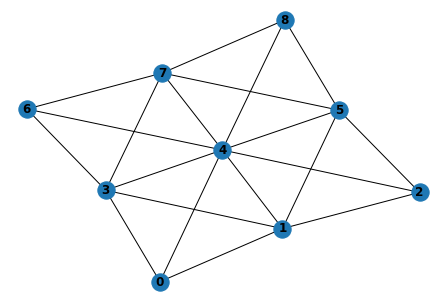

In [7]:
test = Map()
test.raw_draw()

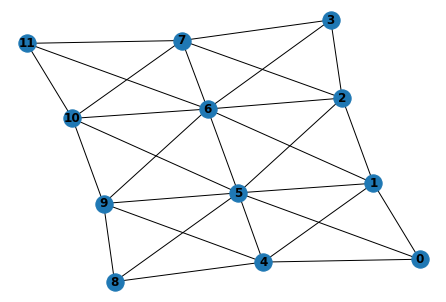

In [8]:
test2 = Map(3,4)
test2.raw_draw()

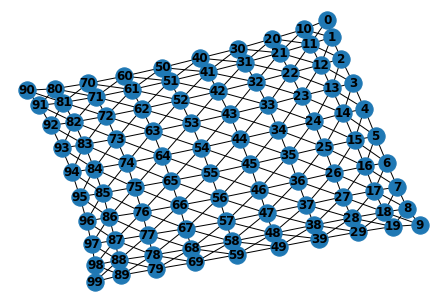

In [40]:
test3 = Map(10,10)
test3.raw_draw()

testing the add node

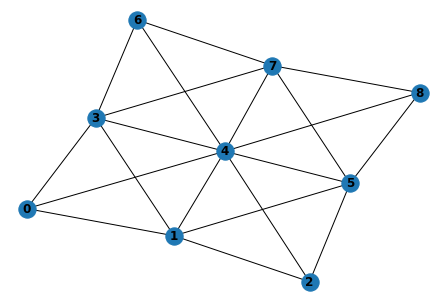

In [10]:
test = Map()
test.raw_draw()

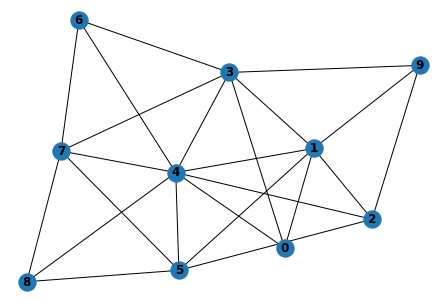

In [11]:
test.add_node([1,2,3])
test.raw_draw()

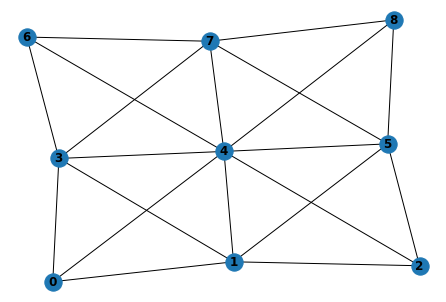

In [12]:
test.remove_node(9)
test.raw_draw()

testing add/remove edge

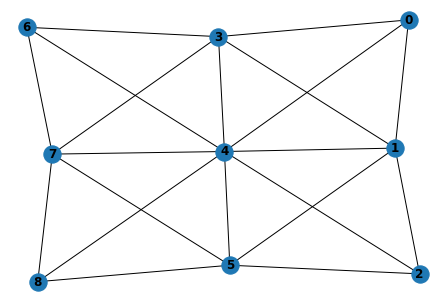

In [20]:
test = Map()
test.raw_draw()

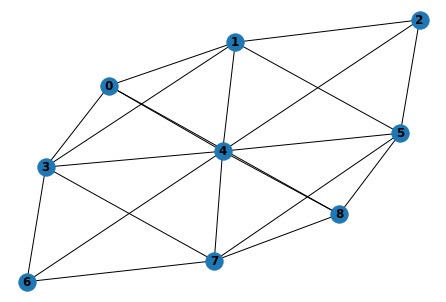

In [36]:
test.add_edge( (0,8) )
test.raw_draw()

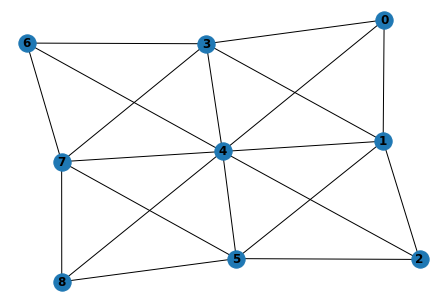

In [37]:
test.remove_edge( (0,8) )
test.raw_draw()

Playing around with obstacles

{}


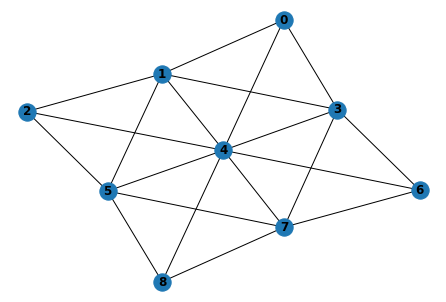

In [46]:
test = Map()
print(test.obstacles)
test.raw_draw()

{8: [4, 5, 7]}


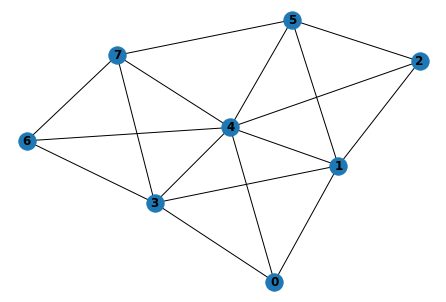

In [47]:
test.add_obstacle(8)
print(test.obstacles)
test.raw_draw()

{8: [4, 5, 7]}


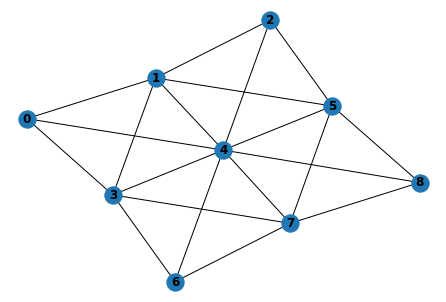

In [48]:
test.remove_obstacle(8)
print(test.obstacles)
test.raw_draw()